In [1]:
import requests
import os
import sys
import pandas as pd
import pandasql as ps
import numpy as np
import pyodbc
from scipy.stats import ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from scipy import stats
import statsmodels.api as sm
from scipy.stats import chisquare as cs
from scipy.stats import chi2_contingency

## Overall Latin America Average Marketing Attribution by JOURNEY LENGTH in 2018 for Channel Email

In [11]:
#EMAIL VISITS FOR CLIENT TYPE

cnxn = pyodbc.connect(DSN="MPW",ansi=True)
df_jl_v = pd.io.sql.read_sql_query(
    """SELECT 
            ACTIVITY_DATA_KEY,
            ACTIVITY_TYPE,
            OPTY_BU,
            CHANNEL,
			JOURNEY_LENGTH_GROUP,
            COUNT(ACTIVITY_DATA_KEY) AS ACT_CT,
            AVG(ACTIVITY_ATTR) AS AVG_ATTR
            
            FROM BACC_PRD_IDM_ACS.ACS_MKTA1.MTA_TRANSPOSED_2018 
            
            WHERE OPTY_IOT = 'Latin America'
            AND ACTIVITY_TYPE IN ('VISIT')
            AND OPTY_FLAG=1
            AND OPTY_BU IS NOT NULL
			AND JOURNEY_END_DT >= '2018-01-01 00:00:00'
			AND CHANNEL = 'Email'
            AND OPTY_BU = 'Cloud and Data Platform'
            --AND JOURNEY_ID NOT IN ('2219227','2285215','2178007','1740668','1812497','1566333','2680631','2074916','2123998','3697367','2261009','3173237','2806182','162065','1987694','3251753','2904433','3367491','2885076','2719374','2475044','2509893','2871373','3015727','1874256','2806184','3246463','1828795','1950468','2160467','2841538','1805978','1896996','2219149','1726237','1989716','2037995','2193612','2903472','2253941','2047978','1835911','2970004','1766040','2278371','3590264','2974398','2096473','2333547','3466321','2877105','2185891','3015725','3479273','3606253','1798943','2841543','1750868','1912627','2841540','3289367','1726232','1822452','2219175','1874258','1916887','2955799','3596811','2976803','2365966','3275796','3015678','3329483','3015729','1799211','2045218','3313612','2017508','2491148','3394756','2841539','3015681','3171663','3015677','3246465','2855561','1987693','3702984','2930043','3015724','2051917','2007031','1874257','1940558','3015680','2132515','3575523','2218819','3173238','2887257','2778739','3134578','3479274','3202930','2268944','3386068','2189473','3351573','1912945','1918473','2408177','3025348','3173234','3710361','3165255','2199726','1726191','2219174','2491145','3015731','2130085','2345758','2719370','1901913','1950344','1939088','3203999','3110517','1746506','3075340','1950469','2003630','1767358','1768192','2513594','1946231','2098951','3015730','2868604','2193221','1958799','1740669','1950467','3173236','2955902','356950','2106855','2866797','2959908','2081707','2780501','1991015','1797709','3710363','1933094','2491146','2228964','3483773','3705582','2864306','3167666','2026747','2872579','2250841','2034983','1987692','2183954','2920766','2189245','2233198','2927493','1825313','3110518','1827545','2033009','2145958','2160466','2349765','2841542','2680630','2114697','3015679','3697368','2251165','2360405','2484217','2250085','2645360','3417386','2111028','3167667','1740670','1982276','2189472','2204841','2268945','1749522','1943510','2923135','2106856','3328031','2191782','1746505','1939089','2862631','3283422','2883719','1798942','1884893','2059796','2193573','2778740','1930893','3015732','2702425','3015726','1726233','1763336','1822734','2155138','2904432','2984442','3204000','2123999','2132514','2630912','3015682','3483772','2719369','2918761','2967798','1756659','1932828','1951585','2936101','3173235','2491147','2878742','1920448','2074046','3551005','2160049','2292745','2405821','2155146','2843367','3112542','2169217','2841537','2891026','3622181','3710360','2900423','1906367','1946229','2868603','1816477','1894065','3006281','2224469','3443209','3015728','2271347','3710362','2351889','2112932','2235349','2840161','1793257','2906702','2915261','2930875','2160468')

            GROUP BY
				ACTIVITY_DATA_KEY,
                ACTIVITY_TYPE,
                OPTY_BU,
				CHANNEL,
				JOURNEY_LENGTH_GROUP; """, con=cnxn)

cnxn.close()
df_jl_v.head(5)

,ACTIVITY_DATA_KEY,ACTIVITY_TYPE,OPTY_BU,CHANNEL,JOURNEY_LENGTH_GROUP,ACT_CT,AVG_ATTR
0,1315154793,VISIT,Cloud and Data Platform,Email,MEDIUM,1,-0.066448
1,2275913063,VISIT,Cloud and Data Platform,Email,SHORT,1,0.001401
2,378166833,VISIT,Cloud and Data Platform,Email,LONG,1,-0.000149
3,2139502806,VISIT,Cloud and Data Platform,Email,MEDIUM,3,-0.000023
4,1339312203,VISIT,Cloud and Data Platform,Email,SHORT,1,-0.000133


In [12]:
#EMAIL INTERACTIONS FOR CLIENT_TYPE

cnxn = pyodbc.connect(DSN="MPW",ansi=True)
df_jl_i = pd.io.sql.read_sql_query(
     """SELECT 
            ACTIVITY_DATA_KEY,
            ACTIVITY_TYPE,
            OPTY_BU,
            CHANNEL,
			JOURNEY_LENGTH_GROUP,
            COUNT(ACTIVITY_DATA_KEY) AS ACT_CT,
            AVG(ACTIVITY_ATTR) AS AVG_ATTR
            
            FROM BACC_PRD_IDM_ACS.ACS_MKTA1.MTA_TRANSPOSED_2018 
            
            WHERE OPTY_IOT = 'Latin America'
            AND ACTIVITY_TYPE IN ('INTERACTION')
            AND OPTY_FLAG=1
            AND OPTY_BU IS NOT NULL
			AND JOURNEY_END_DT >= '2018-01-01 00:00:00'
			AND CHANNEL = 'Email'
            AND OPTY_BU = 'Cloud and Data Platform'
            --AND JOURNEY_ID NOT IN ('2219227','2285215','2178007','1740668','1812497','1566333','2680631','2074916','2123998','3697367','2261009','3173237','2806182','162065','1987694','3251753','2904433','3367491','2885076','2719374','2475044','2509893','2871373','3015727','1874256','2806184','3246463','1828795','1950468','2160467','2841538','1805978','1896996','2219149','1726237','1989716','2037995','2193612','2903472','2253941','2047978','1835911','2970004','1766040','2278371','3590264','2974398','2096473','2333547','3466321','2877105','2185891','3015725','3479273','3606253','1798943','2841543','1750868','1912627','2841540','3289367','1726232','1822452','2219175','1874258','1916887','2955799','3596811','2976803','2365966','3275796','3015678','3329483','3015729','1799211','2045218','3313612','2017508','2491148','3394756','2841539','3015681','3171663','3015677','3246465','2855561','1987693','3702984','2930043','3015724','2051917','2007031','1874257','1940558','3015680','2132515','3575523','2218819','3173238','2887257','2778739','3134578','3479274','3202930','2268944','3386068','2189473','3351573','1912945','1918473','2408177','3025348','3173234','3710361','3165255','2199726','1726191','2219174','2491145','3015731','2130085','2345758','2719370','1901913','1950344','1939088','3203999','3110517','1746506','3075340','1950469','2003630','1767358','1768192','2513594','1946231','2098951','3015730','2868604','2193221','1958799','1740669','1950467','3173236','2955902','356950','2106855','2866797','2959908','2081707','2780501','1991015','1797709','3710363','1933094','2491146','2228964','3483773','3705582','2864306','3167666','2026747','2872579','2250841','2034983','1987692','2183954','2920766','2189245','2233198','2927493','1825313','3110518','1827545','2033009','2145958','2160466','2349765','2841542','2680630','2114697','3015679','3697368','2251165','2360405','2484217','2250085','2645360','3417386','2111028','3167667','1740670','1982276','2189472','2204841','2268945','1749522','1943510','2923135','2106856','3328031','2191782','1746505','1939089','2862631','3283422','2883719','1798942','1884893','2059796','2193573','2778740','1930893','3015732','2702425','3015726','1726233','1763336','1822734','2155138','2904432','2984442','3204000','2123999','2132514','2630912','3015682','3483772','2719369','2918761','2967798','1756659','1932828','1951585','2936101','3173235','2491147','2878742','1920448','2074046','3551005','2160049','2292745','2405821','2155146','2843367','3112542','2169217','2841537','2891026','3622181','3710360','2900423','1906367','1946229','2868603','1816477','1894065','3006281','2224469','3443209','3015728','2271347','3710362','2351889','2112932','2235349','2840161','1793257','2906702','2915261','2930875','2160468')

            GROUP BY
				ACTIVITY_DATA_KEY,
                ACTIVITY_TYPE,
                OPTY_BU,
				CHANNEL,
				JOURNEY_LENGTH_GROUP; """, con=cnxn)

cnxn.close()
df_jl_i.head(5)

,ACTIVITY_DATA_KEY,ACTIVITY_TYPE,OPTY_BU,CHANNEL,JOURNEY_LENGTH_GROUP,ACT_CT,AVG_ATTR
0,92294426,INTERACTION,Cloud and Data Platform,Email,MEDIUM,1,-0.016079
1,87522877,INTERACTION,Cloud and Data Platform,Email,MEDIUM,1,0.000229
2,79720341,INTERACTION,Cloud and Data Platform,Email,MEDIUM,1,0.000177
3,80270624,INTERACTION,Cloud and Data Platform,Email,SHORT,2,-0.026383
4,90753748,INTERACTION,Cloud and Data Platform,Email,SHORT,1,-0.014542


### Tukey Test after Identifying Significance via One-Way Anova for Average Activities in 2018 by Journey Length

### SYSTEMS VISITS

In [13]:
#EMAIL VISITS FOR JOURNEY LENGTH:  SYSTEMS

df_jl_v_sy = """
    
    SELECT 
        ACTIVITY_DATA_KEY,
        JOURNEY_LENGTH_GROUP,
        SUM(ACT_CT) AS TOT_ACT,
        AVG(ACT_CT) AS AVG_ACT,
        AVG(AVG_ATTR) AS ATTR
       
        FROM df_jl_v
        
        GROUP BY
            ACTIVITY_DATA_KEY,
            JOURNEY_LENGTH_GROUP; """

df_jl_v_s = (ps.sqldf(df_jl_v_sy, locals()))
df_jl_v_s.head(5)

,ACTIVITY_DATA_KEY,JOURNEY_LENGTH_GROUP,TOT_ACT,AVG_ACT,ATTR
0,125387,MEDIUM,1,1.0,1.803841e-04
1,1176290,MEDIUM,1,1.0,1.803841e-04
2,1646937,SHORT,1,1.0,1.056028e-06
3,1658281,MEDIUM,1,1.0,-6.080296e-07
4,2508509,SHORT,1,1.0,-3.858546e-03


group1,group2,meandiff,lower,upper,reject
LONG,MEDIUM,0.0511,-0.1102,0.2124,False
LONG,SHORT,0.2461,0.0839,0.4084,True
MEDIUM,SHORT,0.195,0.0621,0.3279,True


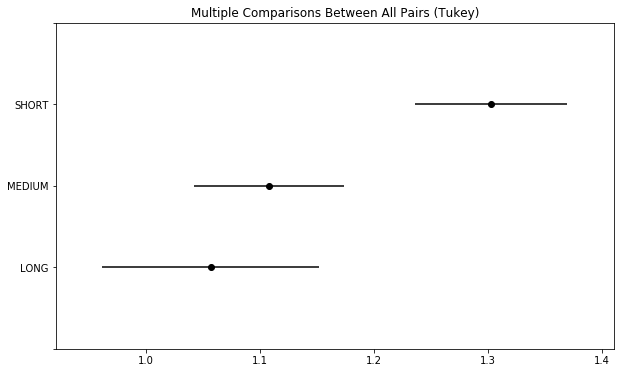

In [14]:
#EMAIL VISITS FOR JOURNEY LENGTH:  SYSTEMS

tukey_jl_v_s = pairwise_tukeyhsd(endog=df_jl_v_s['AVG_ACT'],     # Data
                          groups=df_jl_v_s['JOURNEY_LENGTH_GROUP'],   # Groups
                          alpha=0.05)          # Significance level

tukey_jl_v_s.plot_simultaneous()    # Plot group confidence intervals

tukey_jl_v_s.summary()              # See test summary

In [18]:
#EMAIL VISITS FOR JOURNEY LENGTH:  SYSTEMS

df_jl_v_s2 = """
    
    SELECT 
        JOURNEY_LENGTH_GROUP,
        COUNT(ACTIVITY_DATA_KEY) AS JOURNEYS,
        SUM(TOT_ACT) AS TOT_ACT,
        AVG(AVG_ACT) AS AVG_ACT,
        AVG(ATTR) AS ATTR
       
        FROM df_jl_v_s
        
        GROUP BY 
            JOURNEY_LENGTH_GROUP; """

df_jl_v_s3 = (ps.sqldf(df_jl_v_s2, locals()))
df_jl_v_s3.head(5)

,JOURNEY_LENGTH_GROUP,JOURNEYS,TOT_ACT,AVG_ACT,ATTR
0,LONG,101,106,1.049505,0.000039
1,MEDIUM,55,64,1.163636,-0.002817
2,SHORT,180,242,1.344444,-0.003416


### SYSTEMS INTERACTIONS

In [19]:
#EMAIL INTERACTIONS FOR JOURNEY LENGTH:  SYSTEMS

df_jl_i_sy = """
    
   SELECT 
        ACTIVITY_DATA_KEY,
        JOURNEY_LENGTH_GROUP,
        SUM(ACT_CT) AS TOT_ACT,
        AVG(ACT_CT) AS AVG_ACT,
        AVG(AVG_ATTR) AS ATTR
       
        FROM df_jl_i
        WHERE OPTY_BU IN ('Systems Hardware', 'Systems Software')
        
        GROUP BY
            ACTIVITY_DATA_KEY,
            JOURNEY_LENGTH_GROUP; """

df_jl_i_s = (ps.sqldf(df_jl_i_sy, locals()))
df_jl_i_s.head(5)

,ACTIVITY_DATA_KEY,JOURNEY_LENGTH_GROUP,TOT_ACT,AVG_ACT,ATTR
0,6680357,LONG,1,1.0,-0.000152
1,6773337,LONG,1,1.0,0.006918
2,6790186,LONG,1,1.0,-0.000208
3,6799833,LONG,1,1.0,-0.000803
4,6799865,LONG,3,3.0,0.000655


group1,group2,meandiff,lower,upper,reject
LONG,MEDIUM,0.0449,0.0196,0.0701,True
LONG,SHORT,0.0597,0.039,0.0803,True
MEDIUM,SHORT,0.0148,-0.0047,0.0344,False


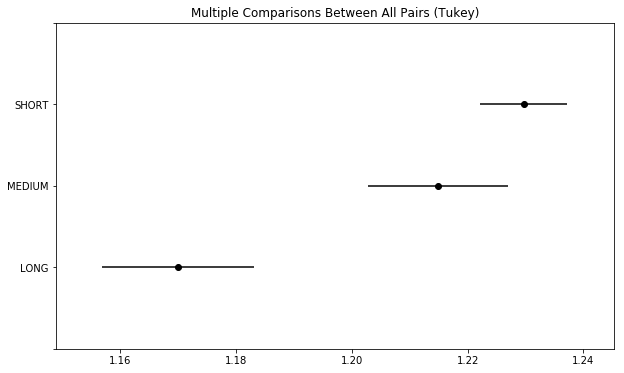

In [20]:
#EMAIL INTERACTIONS FOR JOURNEY LENGTH:  SYSTEMS

tukey_jl_i_s = pairwise_tukeyhsd(endog=df_jl_i_s['AVG_ACT'],     # Data
                          groups=df_jl_i_s['JOURNEY_LENGTH_GROUP'],   # Groups
                          alpha=0.05)          # Significance level

tukey_jl_i_s.plot_simultaneous()    # Plot group confidence intervals

tukey_jl_i_s.summary()              # See test summary

In [21]:
#EMAIL INTERACTIONS FOR JOURNEY LENGTH:  SYSTEMS

df_jl_i_s2 = """
    
    SELECT 
        JOURNEY_LENGTH_GROUP,
        COUNT(ACTIVITY_DATA_KEY) AS JOURNEYS,
        SUM(TOT_ACT) AS TOT_ACT,
        AVG(AVG_ACT) AS AVG_ACT,
        AVG(ATTR) AS ATTR
       
        FROM df_jl_i_s
        
        GROUP BY 
            JOURNEY_LENGTH_GROUP; """

df_jl_i_s3 = (ps.sqldf(df_jl_i_s2, locals()))
df_jl_i_s3.head(5)

,JOURNEY_LENGTH_GROUP,JOURNEYS,TOT_ACT,AVG_ACT,ATTR
0,LONG,4770,5581,1.170021,-0.001562
1,MEDIUM,5459,6632,1.214875,-0.008014
2,SHORT,18796,23169,1.229703,-0.005441


## Overall Latin America Average Marketing Attribution by CLIENT TYPE in 2018 for Channel Email

In [22]:
#EMAIL VISITS FOR CLIENT TYPE

cnxn = pyodbc.connect(DSN="MPW",ansi=True)
df_c_v = pd.io.sql.read_sql_query(
    """SELECT 
            ACTIVITY_DATA_KEY,
            ACTIVITY_TYPE,
            OPTY_BU,
            CHANNEL,
			CLIENT_TYPE,
            COUNT(ACTIVITY_DATA_KEY) AS ACT_CT,
            AVG(ACTIVITY_ATTR) AS AVG_ATTR
            
            FROM BACC_PRD_IDM_ACS.ACS_MKTA1.MTA_TRANSPOSED_2018 
            
            WHERE OPTY_IOT = 'Latin America'
            AND ACTIVITY_TYPE IN ('VISIT')
            AND OPTY_FLAG=1
            AND OPTY_BU IS NOT NULL
			AND JOURNEY_END_DT >= '2018-01-01 00:00:00'
			AND CHANNEL = 'Email'
            AND OPTY_BU IN ('Hybrid Cloud','Systems Hardware','Systems Software')
			AND JOURNEY_ID NOT IN ('2219227','2285215','2178007','1740668','1812497','1566333','2680631','2074916','2123998','3697367','2261009','3173237','2806182','162065','1987694','3251753','2904433','3367491','2885076','2719374','2475044','2509893','2871373','3015727','1874256','2806184','3246463','1828795','1950468','2160467','2841538','1805978','1896996','2219149','1726237','1989716','2037995','2193612','2903472','2253941','2047978','1835911','2970004','1766040','2278371','3590264','2974398','2096473','2333547','3466321','2877105','2185891','3015725','3479273','3606253','1798943','2841543','1750868','1912627','2841540','3289367','1726232','1822452','2219175','1874258','1916887','2955799','3596811','2976803','2365966','3275796','3015678','3329483','3015729','1799211','2045218','3313612','2017508','2491148','3394756','2841539','3015681','3171663','3015677','3246465','2855561','1987693','3702984','2930043','3015724','2051917','2007031','1874257','1940558','3015680','2132515','3575523','2218819','3173238','2887257','2778739','3134578','3479274','3202930','2268944','3386068','2189473','3351573','1912945','1918473','2408177','3025348','3173234','3710361','3165255','2199726','1726191','2219174','2491145','3015731','2130085','2345758','2719370','1901913','1950344','1939088','3203999','3110517','1746506','3075340','1950469','2003630','1767358','1768192','2513594','1946231','2098951','3015730','2868604','2193221','1958799','1740669','1950467','3173236','2955902','356950','2106855','2866797','2959908','2081707','2780501','1991015','1797709','3710363','1933094','2491146','2228964','3483773','3705582','2864306','3167666','2026747','2872579','2250841','2034983','1987692','2183954','2920766','2189245','2233198','2927493','1825313','3110518','1827545','2033009','2145958','2160466','2349765','2841542','2680630','2114697','3015679','3697368','2251165','2360405','2484217','2250085','2645360','3417386','2111028','3167667','1740670','1982276','2189472','2204841','2268945','1749522','1943510','2923135','2106856','3328031','2191782','1746505','1939089','2862631','3283422','2883719','1798942','1884893','2059796','2193573','2778740','1930893','3015732','2702425','3015726','1726233','1763336','1822734','2155138','2904432','2984442','3204000','2123999','2132514','2630912','3015682','3483772','2719369','2918761','2967798','1756659','1932828','1951585','2936101','3173235','2491147','2878742','1920448','2074046','3551005','2160049','2292745','2405821','2155146','2843367','3112542','2169217','2841537','2891026','3622181','3710360','2900423','1906367','1946229','2868603','1816477','1894065','3006281','2224469','3443209','3015728','2271347','3710362','2351889','2112932','2235349','2840161','1793257','2906702','2915261','2930875','2160468')

            GROUP BY
				ACTIVITY_DATA_KEY,
                ACTIVITY_TYPE,
                OPTY_BU,
				CHANNEL,
				CLIENT_TYPE; """, con=cnxn)

cnxn.close()
df_c_v.head(5)

,ACTIVITY_DATA_KEY,ACTIVITY_TYPE,OPTY_BU,CHANNEL,CLIENT_TYPE,ACT_CT,AVG_ATTR
0,2183609487,VISIT,Systems Software,Email,E,2,0.000019
1,2201714504,VISIT,Systems Hardware,Email,I,1,-0.000226
2,1342660143,VISIT,Systems Hardware,Email,C,1,0.000759
3,1599140312,VISIT,Systems Hardware,Email,C,1,0.000076
4,1592901140,VISIT,Systems Hardware,Email,E,1,0.000010


In [23]:
#EMAIL INTERACTIONS FOR CLIENT TYPE

cnxn = pyodbc.connect(DSN="MPW",ansi=True)
df_c_i = pd.io.sql.read_sql_query(
     """SELECT 
            ACTIVITY_DATA_KEY,
            ACTIVITY_TYPE,
            OPTY_BU,
            CHANNEL,
			CLIENT_TYPE,
            COUNT(ACTIVITY_DATA_KEY) AS ACT_CT,
            AVG(ACTIVITY_ATTR) AS AVG_ATTR
            
            FROM BACC_PRD_IDM_ACS.ACS_MKTA1.MTA_TRANSPOSED_2018 
            
            WHERE OPTY_IOT = 'Latin America'
            AND ACTIVITY_TYPE IN ('INTERACTION')
            AND OPTY_FLAG=1
            AND OPTY_BU IS NOT NULL
			AND JOURNEY_END_DT >= '2018-01-01 00:00:00'
			AND CHANNEL = 'Email'
            AND OPTY_BU IN ('Hybrid Cloud','Systems Hardware','Systems Software')
			AND JOURNEY_ID NOT IN ('2219227','2285215','2178007','1740668','1812497','1566333','2680631','2074916','2123998','3697367','2261009','3173237','2806182','162065','1987694','3251753','2904433','3367491','2885076','2719374','2475044','2509893','2871373','3015727','1874256','2806184','3246463','1828795','1950468','2160467','2841538','1805978','1896996','2219149','1726237','1989716','2037995','2193612','2903472','2253941','2047978','1835911','2970004','1766040','2278371','3590264','2974398','2096473','2333547','3466321','2877105','2185891','3015725','3479273','3606253','1798943','2841543','1750868','1912627','2841540','3289367','1726232','1822452','2219175','1874258','1916887','2955799','3596811','2976803','2365966','3275796','3015678','3329483','3015729','1799211','2045218','3313612','2017508','2491148','3394756','2841539','3015681','3171663','3015677','3246465','2855561','1987693','3702984','2930043','3015724','2051917','2007031','1874257','1940558','3015680','2132515','3575523','2218819','3173238','2887257','2778739','3134578','3479274','3202930','2268944','3386068','2189473','3351573','1912945','1918473','2408177','3025348','3173234','3710361','3165255','2199726','1726191','2219174','2491145','3015731','2130085','2345758','2719370','1901913','1950344','1939088','3203999','3110517','1746506','3075340','1950469','2003630','1767358','1768192','2513594','1946231','2098951','3015730','2868604','2193221','1958799','1740669','1950467','3173236','2955902','356950','2106855','2866797','2959908','2081707','2780501','1991015','1797709','3710363','1933094','2491146','2228964','3483773','3705582','2864306','3167666','2026747','2872579','2250841','2034983','1987692','2183954','2920766','2189245','2233198','2927493','1825313','3110518','1827545','2033009','2145958','2160466','2349765','2841542','2680630','2114697','3015679','3697368','2251165','2360405','2484217','2250085','2645360','3417386','2111028','3167667','1740670','1982276','2189472','2204841','2268945','1749522','1943510','2923135','2106856','3328031','2191782','1746505','1939089','2862631','3283422','2883719','1798942','1884893','2059796','2193573','2778740','1930893','3015732','2702425','3015726','1726233','1763336','1822734','2155138','2904432','2984442','3204000','2123999','2132514','2630912','3015682','3483772','2719369','2918761','2967798','1756659','1932828','1951585','2936101','3173235','2491147','2878742','1920448','2074046','3551005','2160049','2292745','2405821','2155146','2843367','3112542','2169217','2841537','2891026','3622181','3710360','2900423','1906367','1946229','2868603','1816477','1894065','3006281','2224469','3443209','3015728','2271347','3710362','2351889','2112932','2235349','2840161','1793257','2906702','2915261','2930875','2160468')

            GROUP BY
				ACTIVITY_DATA_KEY,
                ACTIVITY_TYPE,
                OPTY_BU,
				CHANNEL,
				CLIENT_TYPE; """, con=cnxn)

cnxn.close()
df_c_i.head(5)

,ACTIVITY_DATA_KEY,ACTIVITY_TYPE,OPTY_BU,CHANNEL,CLIENT_TYPE,ACT_CT,AVG_ATTR
0,69765625,INTERACTION,Systems Hardware,Email,C,1,0.070031
1,99350678,INTERACTION,Systems Hardware,Email,E,1,-0.020013
2,85601418,INTERACTION,Systems Hardware,Email,C,1,-0.070802
3,22185424,INTERACTION,Systems Hardware,Email,C,1,0.003463
4,92132925,INTERACTION,Systems Hardware,Email,E,2,0.000015


### Tukey Test after Identifying Significance via One-Way Anova for Average Activities in 2018 by Journey Length

### SYSTEMS VISITS

In [24]:
#EMAIL VISITS FOR CLIENT TYPE:  SYSTEMS

df_c_v_sy = """
    
    SELECT 
        ACTIVITY_DATA_KEY,
        CLIENT_TYPE,
        SUM(ACT_CT) AS TOT_ACT,
        AVG(ACT_CT) AS AVG_ACT,
        AVG(AVG_ATTR) AS ATTR
       
        FROM df_c_v
        WHERE OPTY_BU IN ('Systems Hardware', 'Systems Software')
        
        GROUP BY 
            ACTIVITY_DATA_KEY, 
            CLIENT_TYPE; """

df_c_v_s = (ps.sqldf(df_c_v_sy, locals()))
df_c_v_s.head(5)

,ACTIVITY_DATA_KEY,CLIENT_TYPE,TOT_ACT,AVG_ACT,ATTR
0,6936197,C,2,2.0,0.002505
1,9609534,E,2,2.0,0.000037
2,10557719,C,1,1.0,-0.000623
3,12445944,E,2,2.0,0.000006
4,14257806,C,1,1.0,-0.000623


group1,group2,meandiff,lower,upper,reject
C,E,0.1211,-0.0849,0.327,False
C,I,0.418,0.132,0.7041,True
E,I,0.297,-0.0195,0.6134,False


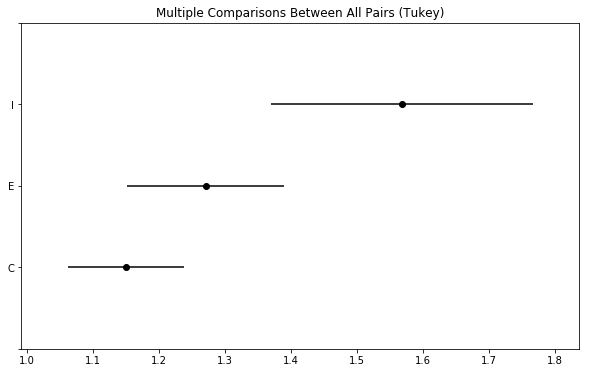

In [25]:
#EMAIL VISITS FOR CLIENT TYPE:  SYSTEMS

tukey_c_v_s = pairwise_tukeyhsd(endog=df_c_v_s['AVG_ACT'],     # Data
                          groups=df_c_v_s['CLIENT_TYPE'],   # Groups
                          alpha=0.05)          # Significance level

tukey_c_v_s.plot_simultaneous()    # Plot group confidence intervals

tukey_c_v_s.summary()              # See test summary

In [26]:
#EMAIL VISITS FOR CLIENT TYPE:  SYSTEMS

df_c_v_s2 = """
    
    SELECT 
        CLIENT_TYPE,
        COUNT(ACTIVITY_DATA_KEY) AS JOURNEYS,
        SUM(TOT_ACT) AS TOT_ACT,
        AVG(AVG_ACT) AS AVG_ACT,
        AVG(ATTR) AS ATTR
       
        FROM df_c_v_s
        
        GROUP BY 
            CLIENT_TYPE; """

df_c_v_s3 = (ps.sqldf(df_c_v_s2, locals()))
df_c_v_s3.head(5)

,CLIENT_TYPE,JOURNEYS,TOT_ACT,AVG_ACT,ATTR
0,C,214,246,1.149533,-0.001002
1,E,85,108,1.270588,-0.006744
2,I,37,58,1.567568,0.000589


### SYSTEMS INTERACTIONS

In [27]:
#EMAIL INTERACTIONS FOR CLIENT TYPE:  SYSTEMS

df_c_i_sy = """
    
    SELECT 
        ACTIVITY_DATA_KEY,
        CLIENT_TYPE,
        SUM(ACT_CT) AS TOT_ACT,
        AVG(ACT_CT) AS AVG_ACT,
        AVG(AVG_ATTR) AS ATTR
       
        FROM df_c_i
        WHERE OPTY_BU IN ('Systems Hardware', 'Systems Software')
        
        GROUP BY 
            ACTIVITY_DATA_KEY, 
            CLIENT_TYPE; """

df_c_i_s = (ps.sqldf(df_c_i_sy, locals()))
df_c_i_s.head(5)

,ACTIVITY_DATA_KEY,CLIENT_TYPE,TOT_ACT,AVG_ACT,ATTR
0,6680357,E,1,1.0,-0.000152
1,6773337,C,1,1.0,0.006918
2,6790186,C,1,1.0,-0.000208
3,6799833,C,1,1.0,-0.000803
4,6799865,E,3,3.0,0.000655


group1,group2,meandiff,lower,upper,reject
C,E,0.0258,0.0096,0.0419,True
C,I,0.0294,0.0039,0.0549,True
E,I,0.0036,-0.0229,0.0302,False


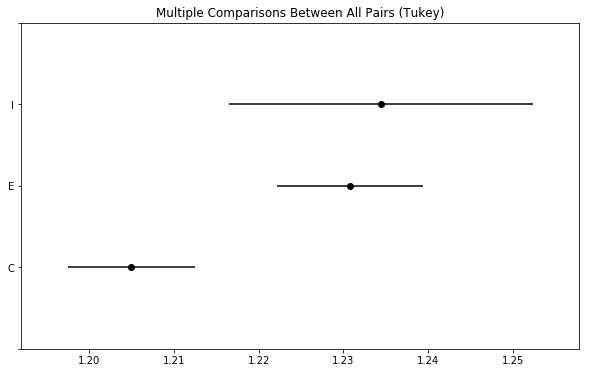

In [28]:
#EMAIL INTERACTIONS FOR CLIENT TYPE:  SYSTEMS

tukey_c_i_s = pairwise_tukeyhsd(endog=df_c_i_s['AVG_ACT'],     # Data
                          groups=df_c_i_s['CLIENT_TYPE'],   # Groups
                          alpha=0.05)          # Significance level

tukey_c_i_s.plot_simultaneous()    # Plot group confidence intervals

tukey_c_i_s.summary()              # See test summary

In [29]:
#EMAIL INTERACTIONS FOR JOURNEY LENGTH:  SYSTEMS

df_c_i_s2 = """
    
    SELECT 
        CLIENT_TYPE,
        COUNT(ACTIVITY_DATA_KEY) AS JOURNEYS,
        SUM(TOT_ACT) AS TOT_ACT,
        AVG(AVG_ACT) AS AVG_ACT,
        AVG(ATTR) AS ATTR
       
        FROM df_c_i_s
        
        GROUP BY 
            CLIENT_TYPE; """

df_c_i_s3 = (ps.sqldf(df_c_i_s2, locals()))
df_c_i_s3.head(5)

,CLIENT_TYPE,JOURNEYS,TOT_ACT,AVG_ACT,ATTR
0,C,15785,19072,1.204973,-0.005853
1,E,10275,12650,1.230754,-0.005134
2,I,2965,3660,1.234401,-0.002812


## Overall Latin America Average Marketing Attribution by CLIENT FLAG in 2018 for Channel Email

In [30]:
#EMAIL VISITS FOR CLIENT FLAG

cnxn = pyodbc.connect(DSN="MPW",ansi=True)
df_f_v = pd.io.sql.read_sql_query(
    """SELECT 
            ACTIVITY_DATA_KEY,
            ACTIVITY_TYPE,
            OPTY_BU,
            CHANNEL,
			CLIENT_FLAG,
            COUNT(ACTIVITY_DATA_KEY) AS ACT_CT,
            AVG(ACTIVITY_ATTR) AS AVG_ATTR
            
            FROM BACC_PRD_IDM_ACS.ACS_MKTA1.MTA_TRANSPOSED_2018
            
            WHERE OPTY_IOT = 'Latin America'
            AND ACTIVITY_TYPE IN ('VISIT')
            AND OPTY_FLAG=1
            AND OPTY_BU IS NOT NULL
			AND JOURNEY_END_DT >= '2018-01-01 00:00:00'
			AND CHANNEL = 'Email'
            AND OPTY_BU IN ('Hybrid Cloud','Systems Hardware','Systems Software')
			AND JOURNEY_ID NOT IN ('2219227','2285215','2178007','1740668','1812497','1566333','2680631','2074916','2123998','3697367','2261009','3173237','2806182','162065','1987694','3251753','2904433','3367491','2885076','2719374','2475044','2509893','2871373','3015727','1874256','2806184','3246463','1828795','1950468','2160467','2841538','1805978','1896996','2219149','1726237','1989716','2037995','2193612','2903472','2253941','2047978','1835911','2970004','1766040','2278371','3590264','2974398','2096473','2333547','3466321','2877105','2185891','3015725','3479273','3606253','1798943','2841543','1750868','1912627','2841540','3289367','1726232','1822452','2219175','1874258','1916887','2955799','3596811','2976803','2365966','3275796','3015678','3329483','3015729','1799211','2045218','3313612','2017508','2491148','3394756','2841539','3015681','3171663','3015677','3246465','2855561','1987693','3702984','2930043','3015724','2051917','2007031','1874257','1940558','3015680','2132515','3575523','2218819','3173238','2887257','2778739','3134578','3479274','3202930','2268944','3386068','2189473','3351573','1912945','1918473','2408177','3025348','3173234','3710361','3165255','2199726','1726191','2219174','2491145','3015731','2130085','2345758','2719370','1901913','1950344','1939088','3203999','3110517','1746506','3075340','1950469','2003630','1767358','1768192','2513594','1946231','2098951','3015730','2868604','2193221','1958799','1740669','1950467','3173236','2955902','356950','2106855','2866797','2959908','2081707','2780501','1991015','1797709','3710363','1933094','2491146','2228964','3483773','3705582','2864306','3167666','2026747','2872579','2250841','2034983','1987692','2183954','2920766','2189245','2233198','2927493','1825313','3110518','1827545','2033009','2145958','2160466','2349765','2841542','2680630','2114697','3015679','3697368','2251165','2360405','2484217','2250085','2645360','3417386','2111028','3167667','1740670','1982276','2189472','2204841','2268945','1749522','1943510','2923135','2106856','3328031','2191782','1746505','1939089','2862631','3283422','2883719','1798942','1884893','2059796','2193573','2778740','1930893','3015732','2702425','3015726','1726233','1763336','1822734','2155138','2904432','2984442','3204000','2123999','2132514','2630912','3015682','3483772','2719369','2918761','2967798','1756659','1932828','1951585','2936101','3173235','2491147','2878742','1920448','2074046','3551005','2160049','2292745','2405821','2155146','2843367','3112542','2169217','2841537','2891026','3622181','3710360','2900423','1906367','1946229','2868603','1816477','1894065','3006281','2224469','3443209','3015728','2271347','3710362','2351889','2112932','2235349','2840161','1793257','2906702','2915261','2930875','2160468')

            GROUP BY
				ACTIVITY_DATA_KEY,
                ACTIVITY_TYPE,
                OPTY_BU,
				CHANNEL,
				CLIENT_FLAG; """, con=cnxn)

cnxn.close()
df_f_v.head(5)

,ACTIVITY_DATA_KEY,ACTIVITY_TYPE,OPTY_BU,CHANNEL,CLIENT_FLAG,ACT_CT,AVG_ATTR
0,2403112151,VISIT,Systems Hardware,Email,1,1,0.000335
1,1397633945,VISIT,Systems Hardware,Email,1,1,0.000004
2,1324261232,VISIT,Systems Hardware,Email,1,1,-0.012931
3,703455890,VISIT,Systems Hardware,Email,1,1,-0.000235
4,2302232300,VISIT,Systems Hardware,Email,0,1,-0.000025


In [31]:
#EMAIL INTERACTIONS FOR CLIENT FLAG

cnxn = pyodbc.connect(DSN="MPW",ansi=True)
df_f_i = pd.io.sql.read_sql_query(
     """SELECT 
            ACTIVITY_DATA_KEY,
            ACTIVITY_TYPE,
            OPTY_BU,
            CHANNEL,
			CLIENT_FLAG,
            COUNT(ACTIVITY_DATA_KEY) AS ACT_CT,
            AVG(ACTIVITY_ATTR) AS AVG_ATTR
            
            FROM BACC_PRD_IDM_ACS.ACS_MKTA1.MTA_TRANSPOSED_2018 
            
            WHERE OPTY_IOT = 'Latin America'
            AND ACTIVITY_TYPE IN ('INTERACTION')
            AND OPTY_FLAG=1
            AND OPTY_BU IS NOT NULL
			AND JOURNEY_END_DT >= '2018-01-01 00:00:00'
			AND CHANNEL = 'Email'
            AND OPTY_BU IN ('Hybrid Cloud','Systems Hardware','Systems Software')
			AND JOURNEY_ID NOT IN ('2219227','2285215','2178007','1740668','1812497','1566333','2680631','2074916','2123998','3697367','2261009','3173237','2806182','162065','1987694','3251753','2904433','3367491','2885076','2719374','2475044','2509893','2871373','3015727','1874256','2806184','3246463','1828795','1950468','2160467','2841538','1805978','1896996','2219149','1726237','1989716','2037995','2193612','2903472','2253941','2047978','1835911','2970004','1766040','2278371','3590264','2974398','2096473','2333547','3466321','2877105','2185891','3015725','3479273','3606253','1798943','2841543','1750868','1912627','2841540','3289367','1726232','1822452','2219175','1874258','1916887','2955799','3596811','2976803','2365966','3275796','3015678','3329483','3015729','1799211','2045218','3313612','2017508','2491148','3394756','2841539','3015681','3171663','3015677','3246465','2855561','1987693','3702984','2930043','3015724','2051917','2007031','1874257','1940558','3015680','2132515','3575523','2218819','3173238','2887257','2778739','3134578','3479274','3202930','2268944','3386068','2189473','3351573','1912945','1918473','2408177','3025348','3173234','3710361','3165255','2199726','1726191','2219174','2491145','3015731','2130085','2345758','2719370','1901913','1950344','1939088','3203999','3110517','1746506','3075340','1950469','2003630','1767358','1768192','2513594','1946231','2098951','3015730','2868604','2193221','1958799','1740669','1950467','3173236','2955902','356950','2106855','2866797','2959908','2081707','2780501','1991015','1797709','3710363','1933094','2491146','2228964','3483773','3705582','2864306','3167666','2026747','2872579','2250841','2034983','1987692','2183954','2920766','2189245','2233198','2927493','1825313','3110518','1827545','2033009','2145958','2160466','2349765','2841542','2680630','2114697','3015679','3697368','2251165','2360405','2484217','2250085','2645360','3417386','2111028','3167667','1740670','1982276','2189472','2204841','2268945','1749522','1943510','2923135','2106856','3328031','2191782','1746505','1939089','2862631','3283422','2883719','1798942','1884893','2059796','2193573','2778740','1930893','3015732','2702425','3015726','1726233','1763336','1822734','2155138','2904432','2984442','3204000','2123999','2132514','2630912','3015682','3483772','2719369','2918761','2967798','1756659','1932828','1951585','2936101','3173235','2491147','2878742','1920448','2074046','3551005','2160049','2292745','2405821','2155146','2843367','3112542','2169217','2841537','2891026','3622181','3710360','2900423','1906367','1946229','2868603','1816477','1894065','3006281','2224469','3443209','3015728','2271347','3710362','2351889','2112932','2235349','2840161','1793257','2906702','2915261','2930875','2160468')

            GROUP BY
				ACTIVITY_DATA_KEY,
                ACTIVITY_TYPE,
                OPTY_BU,
				CHANNEL,
				CLIENT_FLAG; """, con=cnxn)

cnxn.close()
df_f_i.head(5)

,ACTIVITY_DATA_KEY,ACTIVITY_TYPE,OPTY_BU,CHANNEL,CLIENT_FLAG,ACT_CT,AVG_ATTR
0,93879454,INTERACTION,Systems Software,Email,1,1,-0.000164
1,91275224,INTERACTION,Systems Hardware,Email,1,1,0.008518
2,92888699,INTERACTION,Systems Hardware,Email,1,2,-0.026988
3,83494318,INTERACTION,Systems Hardware,Email,1,1,-0.002147
4,99273707,INTERACTION,Systems Hardware,Email,1,1,-0.017013


### Tukey Test after Identifying Significance via One-Way Anova for Average Activities in 2018 by CLIENT FLAG

### SYSTEMS VISITS

In [32]:
#EMAIL VISITS FOR CLIENT FLAG:  SYSTEMS

df_f_v_sy = """
    
    SELECT 
        ACTIVITY_DATA_KEY,
        CLIENT_FLAG,
        SUM(ACT_CT) AS TOT_ACT,
        AVG(ACT_CT) AS AVG_ACT,
        AVG(AVG_ATTR) AS ATTR
       
        FROM df_f_v
        WHERE OPTY_BU IN ('Systems Hardware', 'Systems Software')
        
        GROUP BY 
            ACTIVITY_DATA_KEY, 
            CLIENT_FLAG; """

df_f_v_s = (ps.sqldf(df_f_v_sy, locals()))
df_f_v_s.head(5)

,ACTIVITY_DATA_KEY,CLIENT_FLAG,TOT_ACT,AVG_ACT,ATTR
0,6936197,1,2,2.0,0.002505
1,9609534,1,2,2.0,0.000037
2,10557719,1,1,1.0,-0.000623
3,12445944,1,2,2.0,0.000006
4,14257806,1,1,1.0,-0.000623


In [33]:
#EMAIL VISITS FOR CLIENT FLAG:  SYSTEMS

ttest_f_v_cat1 = df_f_v_s[df_f_v_s['CLIENT_FLAG']==1]
ttest_f_v_cat2 = df_f_v_s[df_f_v_s['CLIENT_FLAG']==0]

ttest_ind(ttest_f_v_cat1['AVG_ACT'], ttest_f_v_cat2['AVG_ACT'])

Ttest_indResult(statistic=3.4695125290401854, pvalue=0.0005897562284646943)

In [34]:
#EMAIL VISITS FOR CLIENT TYPE:  SYSTEMS

df_f_v_s2 = """
    
    SELECT 
        CLIENT_FLAG,
        COUNT(ACTIVITY_DATA_KEY) AS JOURNEYS,
        SUM(TOT_ACT) AS TOT_ACT,
        AVG(AVG_ACT) AS AVG_ACT,
        AVG(ATTR) AS ATTR
       
        FROM df_f_v_s
        
        GROUP BY 
            CLIENT_FLAG; """

df_f_v_s3 = (ps.sqldf(df_f_v_s2, locals()))
df_f_v_s3.head(5)

,CLIENT_FLAG,JOURNEYS,TOT_ACT,AVG_ACT,ATTR
0,0,89,90,1.011236,-0.000668
1,1,247,322,1.303644,-0.002860


### SYSTEMS INTERACTIONS

In [35]:
#EMAIL INTERACTIONS FOR CLIENT FLAG:  SYSTEMS

df_f_i_sy = """
    
    SELECT 
        ACTIVITY_DATA_KEY,
        CLIENT_FLAG,
        SUM(ACT_CT) AS TOT_ACT,
        AVG(ACT_CT) AS AVG_ACT,
        AVG(AVG_ATTR) AS ATTR
       
        FROM df_f_i
        WHERE OPTY_BU IN ('Systems Hardware', 'Systems Software')
        
        GROUP BY 
            ACTIVITY_DATA_KEY, 
            CLIENT_FLAG; """

df_f_i_s = (ps.sqldf(df_f_i_sy, locals()))
df_f_i_s.head(5)

,ACTIVITY_DATA_KEY,CLIENT_FLAG,TOT_ACT,AVG_ACT,ATTR
0,6680357,0,1,1.0,-0.000152
1,6773337,0,1,1.0,0.006918
2,6790186,0,1,1.0,-0.000208
3,6799833,0,1,1.0,-0.000803
4,6799865,0,3,3.0,0.000655


In [36]:
#EMAIL VISITS FOR CLIENT FLAG:  SYSTEMS

ttest_f_i_cat1 = df_f_i_s[df_f_i_s['CLIENT_FLAG']==1]
ttest_f_i_cat2 = df_f_i_s[df_f_i_s['CLIENT_FLAG']==0]

ttest_ind(ttest_f_i_cat1['AVG_ACT'], ttest_f_i_cat2['AVG_ACT'])

Ttest_indResult(statistic=0.039961065558134966, pvalue=0.968124441531158)

In [37]:
#EMAIL INTERACTIONS FOR JOURNEY LENGTH:  SYSTEMS

df_f_i_s2 = """
    
    SELECT 
        CLIENT_FLAG,
        COUNT(ACTIVITY_DATA_KEY) AS JOURNEYS,
        SUM(TOT_ACT) AS TOT_ACT,
        AVG(AVG_ACT) AS AVG_ACT,
        AVG(ATTR) AS ATTR
       
        FROM df_f_i_s
        
        GROUP BY 
            CLIENT_FLAG; """

df_f_i_s3 = (ps.sqldf(df_f_i_s2, locals()))
df_f_i_s3.head(5)

,CLIENT_FLAG,JOURNEYS,TOT_ACT,AVG_ACT,ATTR
0,0,2847,3464,1.216719,-0.000925
1,1,26178,31918,1.217148,-0.005762


## Overall Latin America Average Marketing Attribution by INDUSTRY in 2018 for Channel Email

In [38]:
#EMAIL VISITS FOR INDUSTRY

cnxn = pyodbc.connect(DSN="MPW",ansi=True)
df_i_v = pd.io.sql.read_sql_query(
    """SELECT 
            ACTIVITY_DATA_KEY,
            ACTIVITY_TYPE,
            OPTY_BU,
            CHANNEL,
			INDUSTRY,
            COUNT(ACTIVITY_DATA_KEY) AS ACT_CT,
            AVG(ACTIVITY_ATTR) AS AVG_ATTR
            
            FROM BACC_PRD_IDM_ACS.ACS_MKTA1.MTA_TRANSPOSED_2018
            
            WHERE OPTY_IOT = 'Latin America'
            AND ACTIVITY_TYPE IN ('VISIT')
            AND OPTY_FLAG=1
            AND OPTY_BU IS NOT NULL
			AND JOURNEY_END_DT >= '2018-01-01 00:00:00'
			AND CHANNEL = 'Email'
            AND OPTY_BU IN ('Hybrid Cloud','Systems Hardware','Systems Software')
			AND JOURNEY_ID NOT IN ('2219227','2285215','2178007','1740668','1812497','1566333','2680631','2074916','2123998','3697367','2261009','3173237','2806182','162065','1987694','3251753','2904433','3367491','2885076','2719374','2475044','2509893','2871373','3015727','1874256','2806184','3246463','1828795','1950468','2160467','2841538','1805978','1896996','2219149','1726237','1989716','2037995','2193612','2903472','2253941','2047978','1835911','2970004','1766040','2278371','3590264','2974398','2096473','2333547','3466321','2877105','2185891','3015725','3479273','3606253','1798943','2841543','1750868','1912627','2841540','3289367','1726232','1822452','2219175','1874258','1916887','2955799','3596811','2976803','2365966','3275796','3015678','3329483','3015729','1799211','2045218','3313612','2017508','2491148','3394756','2841539','3015681','3171663','3015677','3246465','2855561','1987693','3702984','2930043','3015724','2051917','2007031','1874257','1940558','3015680','2132515','3575523','2218819','3173238','2887257','2778739','3134578','3479274','3202930','2268944','3386068','2189473','3351573','1912945','1918473','2408177','3025348','3173234','3710361','3165255','2199726','1726191','2219174','2491145','3015731','2130085','2345758','2719370','1901913','1950344','1939088','3203999','3110517','1746506','3075340','1950469','2003630','1767358','1768192','2513594','1946231','2098951','3015730','2868604','2193221','1958799','1740669','1950467','3173236','2955902','356950','2106855','2866797','2959908','2081707','2780501','1991015','1797709','3710363','1933094','2491146','2228964','3483773','3705582','2864306','3167666','2026747','2872579','2250841','2034983','1987692','2183954','2920766','2189245','2233198','2927493','1825313','3110518','1827545','2033009','2145958','2160466','2349765','2841542','2680630','2114697','3015679','3697368','2251165','2360405','2484217','2250085','2645360','3417386','2111028','3167667','1740670','1982276','2189472','2204841','2268945','1749522','1943510','2923135','2106856','3328031','2191782','1746505','1939089','2862631','3283422','2883719','1798942','1884893','2059796','2193573','2778740','1930893','3015732','2702425','3015726','1726233','1763336','1822734','2155138','2904432','2984442','3204000','2123999','2132514','2630912','3015682','3483772','2719369','2918761','2967798','1756659','1932828','1951585','2936101','3173235','2491147','2878742','1920448','2074046','3551005','2160049','2292745','2405821','2155146','2843367','3112542','2169217','2841537','2891026','3622181','3710360','2900423','1906367','1946229','2868603','1816477','1894065','3006281','2224469','3443209','3015728','2271347','3710362','2351889','2112932','2235349','2840161','1793257','2906702','2915261','2930875','2160468')

            GROUP BY
				ACTIVITY_DATA_KEY,
                ACTIVITY_TYPE,
                OPTY_BU,
				CHANNEL,
				INDUSTRY; """, con=cnxn)

cnxn.close()
df_i_v.head(5)

,ACTIVITY_DATA_KEY,ACTIVITY_TYPE,OPTY_BU,CHANNEL,INDUSTRY,ACT_CT,AVG_ATTR
0,2323728587,VISIT,Systems Hardware,Email,Computer Services,1,-0.000629
1,1337711558,VISIT,Systems Hardware,Email,Education,1,0.000351
2,2268724892,VISIT,Systems Hardware,Email,Telecommunications,1,0.000009
3,2266924614,VISIT,Systems Hardware,Email,Financial Markets,1,0.002188
4,1551227704,VISIT,Systems Hardware,Email,Telecommunications,1,-0.001549


In [39]:
#EMAIL INTERACTIONS FOR INDUSTRY

cnxn = pyodbc.connect(DSN="MPW",ansi=True)
df_i_i = pd.io.sql.read_sql_query(
    """SELECT 
            ACTIVITY_DATA_KEY,
            ACTIVITY_TYPE,
            OPTY_BU,
            CHANNEL,
			INDUSTRY,
            COUNT(ACTIVITY_DATA_KEY) AS ACT_CT,
            AVG(ACTIVITY_ATTR) AS AVG_ATTR
            
            FROM BACC_PRD_IDM_ACS.ACS_MKTA1.MTA_TRANSPOSED_2018
            
            WHERE OPTY_IOT = 'Latin America'
            AND ACTIVITY_TYPE IN ('INTERACTION')
            AND OPTY_FLAG=1
            AND OPTY_BU IS NOT NULL
			AND JOURNEY_END_DT >= '2018-01-01 00:00:00'
			AND CHANNEL = 'Email'
            AND OPTY_BU IN ('Hybrid Cloud','Systems Hardware','Systems Software')
			--AND JOURNEY_ID NOT IN ('2219227','2285215','2178007','1740668','1812497','1566333','2680631','2074916','2123998','3697367','2261009','3173237','2806182','162065','1987694','3251753','2904433','3367491','2885076','2719374','2475044','2509893','2871373','3015727','1874256','2806184','3246463','1828795','1950468','2160467','2841538','1805978','1896996','2219149','1726237','1989716','2037995','2193612','2903472','2253941','2047978','1835911','2970004','1766040','2278371','3590264','2974398','2096473','2333547','3466321','2877105','2185891','3015725','3479273','3606253','1798943','2841543','1750868','1912627','2841540','3289367','1726232','1822452','2219175','1874258','1916887','2955799','3596811','2976803','2365966','3275796','3015678','3329483','3015729','1799211','2045218','3313612','2017508','2491148','3394756','2841539','3015681','3171663','3015677','3246465','2855561','1987693','3702984','2930043','3015724','2051917','2007031','1874257','1940558','3015680','2132515','3575523','2218819','3173238','2887257','2778739','3134578','3479274','3202930','2268944','3386068','2189473','3351573','1912945','1918473','2408177','3025348','3173234','3710361','3165255','2199726','1726191','2219174','2491145','3015731','2130085','2345758','2719370','1901913','1950344','1939088','3203999','3110517','1746506','3075340','1950469','2003630','1767358','1768192','2513594','1946231','2098951','3015730','2868604','2193221','1958799','1740669','1950467','3173236','2955902','356950','2106855','2866797','2959908','2081707','2780501','1991015','1797709','3710363','1933094','2491146','2228964','3483773','3705582','2864306','3167666','2026747','2872579','2250841','2034983','1987692','2183954','2920766','2189245','2233198','2927493','1825313','3110518','1827545','2033009','2145958','2160466','2349765','2841542','2680630','2114697','3015679','3697368','2251165','2360405','2484217','2250085','2645360','3417386','2111028','3167667','1740670','1982276','2189472','2204841','2268945','1749522','1943510','2923135','2106856','3328031','2191782','1746505','1939089','2862631','3283422','2883719','1798942','1884893','2059796','2193573','2778740','1930893','3015732','2702425','3015726','1726233','1763336','1822734','2155138','2904432','2984442','3204000','2123999','2132514','2630912','3015682','3483772','2719369','2918761','2967798','1756659','1932828','1951585','2936101','3173235','2491147','2878742','1920448','2074046','3551005','2160049','2292745','2405821','2155146','2843367','3112542','2169217','2841537','2891026','3622181','3710360','2900423','1906367','1946229','2868603','1816477','1894065','3006281','2224469','3443209','3015728','2271347','3710362','2351889','2112932','2235349','2840161','1793257','2906702','2915261','2930875','2160468')

            GROUP BY
				ACTIVITY_DATA_KEY,
                ACTIVITY_TYPE,
                OPTY_BU,
				CHANNEL,
				INDUSTRY; """, con=cnxn)

cnxn.close()
df_i_i.head(5)

,ACTIVITY_DATA_KEY,ACTIVITY_TYPE,OPTY_BU,CHANNEL,INDUSTRY,ACT_CT,AVG_ATTR
0,93514185,INTERACTION,Systems Hardware,Email,Retail,1,-0.000372
1,16581809,INTERACTION,Systems Hardware,Email,"Government, State/Provincial/Local",1,0.005991
2,95173743,INTERACTION,Systems Hardware,Email,"Government, State/Provincial/Local",1,-0.016349
3,88759725,INTERACTION,Systems Hardware,Email,Education,1,0.000113
4,89154086,INTERACTION,Systems Hardware,Email,Computer Services,1,-0.047769


### SYSTEMS VISITS

In [40]:
#EMAIL VISITS FOR INDUSTRY:  SYSTEMS

df_i_v_sy = """
    
    SELECT 
        ACTIVITY_DATA_KEY,
        INDUSTRY,
        SUM(ACT_CT) AS TOT_ACT,
        AVG(ACT_CT) AS AVG_ACT,
        AVG(AVG_ATTR) AS ATTR
       
        FROM df_i_v
        WHERE OPTY_BU IN ('Systems Hardware', 'Systems Software')
        AND INDUSTRY IS NOT NULL
        
        GROUP BY 
            ACTIVITY_DATA_KEY, 
            INDUSTRY; """

df_i_v_s = (ps.sqldf(df_i_v_sy, locals()))
df_i_v_s.head(5)

,ACTIVITY_DATA_KEY,INDUSTRY,TOT_ACT,AVG_ACT,ATTR
0,6936197,Computer Services,2,2.0,0.002505
1,9609534,Computer Services,2,2.0,0.000037
2,10557719,Computer Services,1,1.0,-0.000623
3,12445944,Computer Services,2,2.0,0.000006
4,14257806,Computer Services,1,1.0,-0.000623


group1,group2,meandiff,lower,upper,reject
Automotive,Banking,0.5306,-0.6187,1.6799,False
Automotive,Chemicals & Petroleum,0.0909,-1.2295,1.4113,False
Automotive,Computer Services,0.2105,-0.9541,1.3752,False
Automotive,Consumer Products,0.0,-1.6423,1.6423,False
Automotive,Education,0.3,-0.8826,1.4826,False
Automotive,Electronics,0.5,-1.5482,2.5482,False
Automotive,Energy & Utilities,0.0,-1.5483,1.5483,False
Automotive,Exclusions,0.0,-2.0482,2.0482,False
Automotive,Financial Markets,0.5625,-0.6918,1.8168,False
Automotive,"Government, Central/Federal",0.1429,-1.2906,1.5763,False


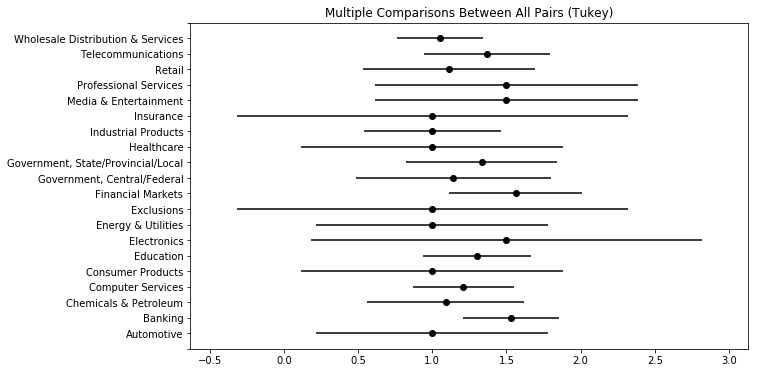

In [41]:
#EMAIL INTERACTIONS FOR INDUSTRY:  SYSTEMS

tukey_i_v_s = pairwise_tukeyhsd(endog=df_i_v_s['AVG_ACT'],     # Data
                          groups=df_i_v_s['INDUSTRY'],   # Groups
                          alpha=0.05)          # Significance level

tukey_i_v_s.plot_simultaneous()    # Plot group confidence intervals

tukey_i_v_s.summary()              # See test summary

In [42]:
#EMAIL VISITS FOR INDUSTRY:  SYSTEMS

df_i_v_s2 = """
    
    SELECT 
        INDUSTRY,
        COUNT(ACTIVITY_DATA_KEY) AS JOURNEYS,
        SUM(TOT_ACT) AS TOT_ACT,
        AVG(AVG_ACT) AS AVG_ACT,
        AVG(ATTR) AS ATTR
       
        FROM df_i_v_s
        
        GROUP BY 
            INDUSTRY; """

df_i_v_s3 = (ps.sqldf(df_i_v_s2, locals()))
df_i_v_s3.head(30)

,INDUSTRY,JOURNEYS,TOT_ACT,AVG_ACT,ATTR
0,Automotive,5,5,1.000000,0.002668
1,Banking,49,75,1.530612,-0.001868
2,Chemicals & Petroleum,11,12,1.090909,-0.000071
3,Computer Services,38,46,1.210526,0.001119
4,Consumer Products,4,4,1.000000,0.005799
5,Education,30,39,1.300000,-0.001275
6,Electronics,2,3,1.500000,-0.080282
7,Energy & Utilities,5,5,1.000000,-0.030660
8,Exclusions,2,2,1.000000,-0.007415
9,Financial Markets,16,25,1.562500,-0.000830


### SYSTEMS INTERACTIONS

In [43]:
#EMAIL INTERACTIONS FOR INDUSTRY:  SYSTEMS

df_i_i_sy = """
    
    SELECT 
        ACTIVITY_DATA_KEY, 
        INDUSTRY,
        SUM(ACT_CT) AS TOT_ACT,
        AVG(ACT_CT) AS AVG_ACT,
        AVG(AVG_ATTR) AS ATTR
       
        FROM df_i_i
        WHERE OPTY_BU IN ('Systems Hardware', 'Systems Software')
        AND INDUSTRY IS NOT NULL
        
        GROUP BY 
            ACTIVITY_DATA_KEY, 
            INDUSTRY; """

df_i_i_s = (ps.sqldf(df_i_i_sy, locals()))
df_i_i_s.head(5)

,ACTIVITY_DATA_KEY,INDUSTRY,TOT_ACT,AVG_ACT,ATTR
0,6680357,Energy & Utilities,1,1.0,-0.000152
1,6726945,Education,1,1.0,0.000430
2,6773337,Healthcare,1,1.0,0.006918
3,6790186,Telecommunications,1,1.0,-0.000208
4,6799833,Wholesale Distribution & Services,1,1.0,-0.000803


group1,group2,meandiff,lower,upper,reject
Aerospace & Defense,Automotive,0.0093,-0.9339,0.9524,False
Aerospace & Defense,Banking,0.2075,-0.7317,1.1467,False
Aerospace & Defense,Chemicals & Petroleum,0.0864,-0.8574,1.0301,False
Aerospace & Defense,Computer Services,0.7249,-0.215,1.6648,False
Aerospace & Defense,Consumer Products,0.2412,-0.7012,1.1836,False
Aerospace & Defense,Education,0.2849,-0.6541,1.224,False
Aerospace & Defense,Electronics,0.6627,-0.2953,1.6208,False
Aerospace & Defense,Energy & Utilities,0.3141,-0.6289,1.2572,False
Aerospace & Defense,Exclusions,0.0,-0.9623,0.9623,False
Aerospace & Defense,Financial Markets,0.4537,-0.4923,1.3997,False


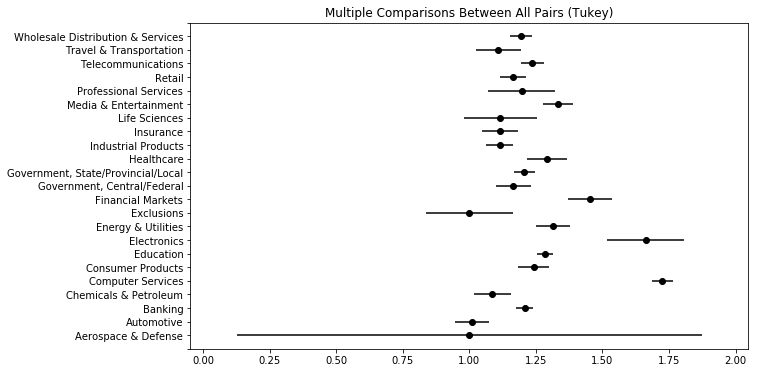

In [44]:
#EMAIL INTERACTIONS FOR INDUSTRY:  SYSTEMS

tukey_i_i_s = pairwise_tukeyhsd(endog=df_i_i_s['AVG_ACT'],     # Data
                          groups=df_i_i_s['INDUSTRY'],   # Groups
                          alpha=0.05)          # Significance level

tukey_i_i_s.plot_simultaneous()    # Plot group confidence intervals

tukey_i_i_s.summary()              # See test summary

In [45]:
#EMAIL INTERACTIONS FOR INDUSTRY:  SYSTEMS

df_i_i_s2 = """
    
    SELECT 
        INDUSTRY,
        COUNT(ACTIVITY_DATA_KEY) AS JOURNEYS,
        SUM(TOT_ACT) AS TOT_ACT,
        AVG(AVG_ACT) AS AVG_ACT,
        AVG(ATTR) AS ATTR
       
        FROM df_i_i_s
        
        GROUP BY 
            INDUSTRY; """

df_i_i_s3 = (ps.sqldf(df_i_i_s2, locals()))
df_i_i_s3.head(30)

,INDUSTRY,JOURNEYS,TOT_ACT,AVG_ACT,ATTR
0,Aerospace & Defense,7,7,1.000000,-0.006675
1,Automotive,754,761,1.009284,-0.004699
2,Banking,8009,9671,1.207517,-0.002887
3,Chemicals & Petroleum,660,717,1.086364,-0.004759
4,Computer Services,2984,5150,1.724866,-0.004488
5,Consumer Products,912,1132,1.241228,-0.008073
6,Education,11645,14963,1.284929,-0.001525
7,Electronics,169,281,1.662722,-0.001867
8,Energy & Utilities,764,1004,1.314136,-0.011848
9,Exclusions,138,138,1.000000,-0.004953
